<a href="https://colab.research.google.com/github/NandaAbhilash/CN6005/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(titanic_df.head())

# Display information about the DataFrame, including data types and non-null counts
print('\nDataFrame Info:')
titanic_df.info()

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)
print(f"Missing values in 'Age' filled with median: {median_age}")

# Display the count of missing values for each column after imputation
print('\nMissing values after Age imputation:')
print(titanic_df.isnull().sum())

Missing values in 'Age' filled with median: 28.0

Missing values after Age imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-391745529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)


In [8]:
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)
print(f"Missing values in 'Age' filled with median: {median_age}")

# Fill missing 'Embarked' values with the mode
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)
print(f"Missing values in 'Embarked' filled with mode: {mode_embarked}")

# Drop 'Cabin' column due to a large number of missing values, but only if it exists
if 'Cabin' in titanic_df.columns:
    titanic_df.drop('Cabin', axis=1, inplace=True)
    print("Dropped 'Cabin' column due to excessive missing values.")
else:
    print("'Cabin' column not found, likely already dropped.")

# Display the count of missing values for each column after imputation and dropping
print('\nMissing values after imputation and column drop:')
print(titanic_df.isnull().sum())

Missing values in 'Age' filled with median: 28.0
Missing values in 'Embarked' filled with mode: S
'Cabin' column not found, likely already dropped.

Missing values after imputation and column drop:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns safely
irrelevant_columns = ['Name', 'Ticket', 'PassengerId']
columns_to_drop_now = [col for col in irrelevant_columns if col in titanic_df.columns]

if columns_to_drop_now:
    titanic_df.drop(columns=columns_to_drop_now, inplace=True)
    print(f"Dropped irrelevant columns: {columns_to_drop_now}")
else:
    print("No irrelevant columns from the list found to drop, likely already dropped.")

# Identify categorical columns for one-hot encoding
categorical_cols = ['Sex', 'Embarked', 'Pclass']

# Apply one-hot encoding
titanic_df_encoded = pd.get_dummies(titanic_df, columns=categorical_cols, drop_first=True, dtype=int)
print('\nDataFrame after one-hot encoding:')
print(titanic_df_encoded.head())

# Separate features (X) and target variable (y)
X = titanic_df_encoded.drop('Survived', axis=1)
y = titanic_df_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'\nShape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

No irrelevant columns from the list found to drop, likely already dropped.

DataFrame after one-hot encoding:
   Survived   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0  22.0      1      0   7.2500         1           0           1   
1         1  38.0      1      0  71.2833         0           0           0   
2         1  26.0      0      0   7.9250         0           0           1   
3         1  35.0      1      0  53.1000         0           0           1   
4         0  35.0      0      0   8.0500         1           0           1   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  

Shape of X_train: (712, 9)
Shape of X_test: (179, 9)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)
print("KNN model trained successfully.")

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy of the KNN model: {accuracy_knn:.4f}")

KNN model trained successfully.

Accuracy of the KNN model: 0.6927


## Train Logistic Regression Classifier

### Subtask:
Initialize and train a Logistic Regression classifier on the preprocessed training data. Evaluate its accuracy on the test set.


```markdown
**Reasoning**:
To train and evaluate the Logistic Regression model, I need to import the `LogisticRegression` class and `accuracy_score`, instantiate the classifier, fit it to the training data, make predictions on the test data, and then calculate and print the accuracy.
```

**Reasoning**:
I need to initialize and train a Logistic Regression classifier on the preprocessed training data, and then evaluate its accuracy on the test set, as per the subtask instructions. This involves importing the necessary libraries, fitting the model, making predictions, and calculating the accuracy.



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
logreg_model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for better convergence with small datasets

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate the accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\nAccuracy of the Logistic Regression model: {accuracy_logreg:.4f}")

Logistic Regression model trained successfully.

Accuracy of the Logistic Regression model: 0.7877


## Compare Accuracies

### Subtask:
Compare the accuracies of the KNN and Logistic Regression classifiers and visualize them using a bar chart for clear comparison, including appropriate labels and a legend.


**Reasoning**:
To compare the accuracies, I will first store them in a pandas Series with appropriate model names as index, then import the necessary plotting libraries, and finally create a bar chart to visualize the comparison with relevant labels and title.



Model Accuracies:
KNN                    0.692737
Logistic Regression    0.787709
dtype: float64


/tmp/ipython-input-359161251.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_accuracies.index, y=model_accuracies.values, palette='viridis')


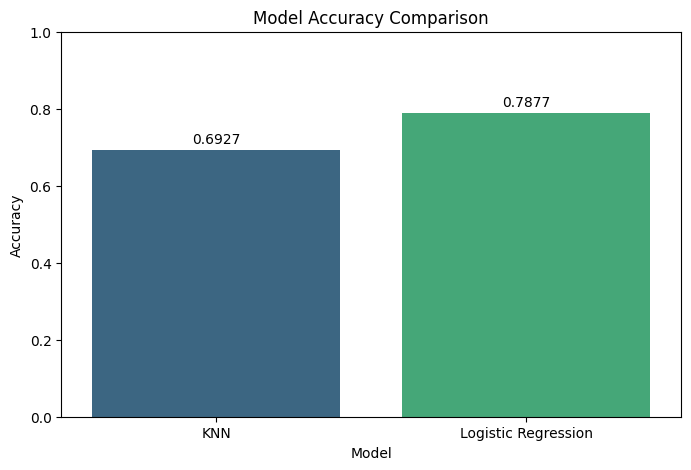

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series or DataFrame to store the accuracies
model_accuracies = pd.Series({
    'KNN': accuracy_knn,
    'Logistic Regression': accuracy_logreg
})

print('Model Accuracies:')
print(model_accuracies)

# Set a larger figure size for better readability
plt.figure(figsize=(8, 5))

# Create a bar chart
sns.barplot(x=model_accuracies.index, y=model_accuracies.values, palette='viridis')

# Set title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for index, value in enumerate(model_accuracies.values):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

# Display the plot
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` about `palette` without `hue` in `seaborn.barplot`. To resolve this and follow seaborn's suggestion, I will assign the `x` variable to `hue` and set `legend=False` in the `barplot` function call.



Model Accuracies:
KNN                    0.692737
Logistic Regression    0.787709
dtype: float64


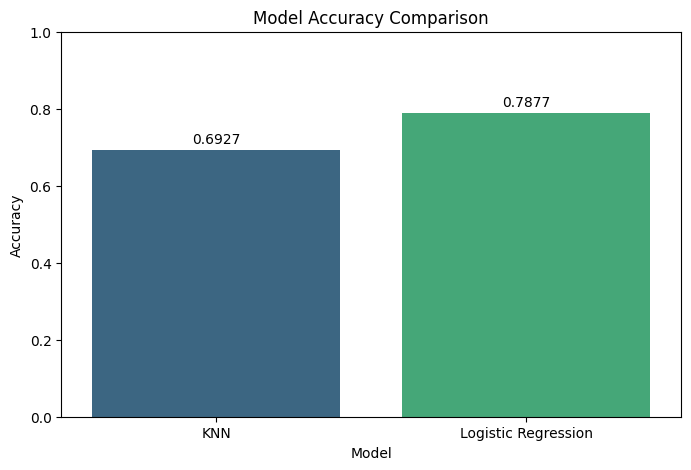

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series or DataFrame to store the accuracies
model_accuracies = pd.Series({
    'KNN': accuracy_knn,
    'Logistic Regression': accuracy_logreg
})

print('Model Accuracies:')
print(model_accuracies)

# Set a larger figure size for better readability
plt.figure(figsize=(8, 5))

# Create a bar chart, addressing the FutureWarning by setting hue to the x variable
sns.barplot(x=model_accuracies.index, y=model_accuracies.values, hue=model_accuracies.index, palette='viridis', legend=False)

# Set title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for index, value in enumerate(model_accuracies.values):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

# Display the plot
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()